In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

(a) Plot the graph with given code, the result should be same as this.
![](originalData.png)
`x_train` and `y_train` are the datas you need to create, `sample_size` is 10 and `std` is 0.25. 

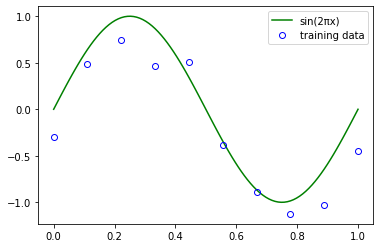

In [3]:
# Write you codes here.
plt.plot(x_test, y_test, 'g', label="sin(2πx)")
plt.plot(x_train, y_train, 'ob', markerfacecolor='none', label="training data")
plt.legend()
plt.show()

(b) On the basis of the results, you should try $0^{th}$ order polynomial, $1^{st}$ order polynomial, $3^{rd}$ order polynomial and some other order polynomial, show the results include fitting and over-fitting.
![](fitting.png)

In [4]:
import itertools 
import functools
class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    
class Regression(object):
    """
    Base class for regressors
    """
    pass
    
class LinearRegression(Regression):
    """
    Linear regression model
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input

        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        return_std : bool, optional
            returns standard deviation of each predition if True

        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each predition
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

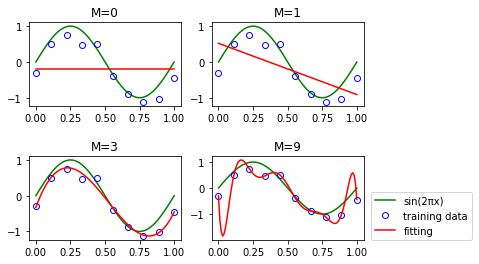

In [5]:
# Write your codes here.
linear_reg = LinearRegression()

poly_feature0 = PolynomialFeature(0)
x_trains0 = poly_feature0.transform(x_train)
x_test0 = poly_feature0.transform(x_test)
linear_reg.fit(x_trains0, y_train)
y_pred_test0 = linear_reg.predict(x_test0)
y_pred_trains0 = linear_reg.predict(x_trains0)

poly_feature1 = PolynomialFeature(1)
x_trains1 = poly_feature1.transform(x_train)
x_test1 = poly_feature1.transform(x_test)
linear_reg.fit(x_trains1, y_train)
y_pred_test1 = linear_reg.predict(x_test1)
y_pred_trains1 = linear_reg.predict(x_trains1)

poly_feature3 = PolynomialFeature(3)
x_trains3 = poly_feature3.transform(x_train)
x_test3 = poly_feature3.transform(x_test)
linear_reg.fit(x_trains3, y_train)
y_pred_test3 = linear_reg.predict(x_test3)
y_pred_trains3 = linear_reg.predict(x_trains3)

poly_feature9 = PolynomialFeature(9)
x_trains9 = poly_feature9.transform(x_train)
x_test9 = poly_feature9.transform(x_test)
linear_reg.fit(x_trains9, y_train)
y_pred_test9 = linear_reg.predict(x_test9)
y_pred_trains9 = linear_reg.predict(x_trains9)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
plt.subplot(2,2,1)
plt.title("M=0")
plt.plot(x_test, y_test, 'g', label="sin(2πx)")
plt.plot(x_train, y_train, 'ob', markerfacecolor='none', label="training data")
plt.plot(x_test, y_pred_test0 ,'r', label="fitting")

plt.subplot(2,2,2)
plt.title("M=1")
plt.plot(x_test, y_test, 'g', label="sin(2πx)")
plt.plot(x_train, y_train, 'ob', markerfacecolor='none', label="training data")
plt.plot(x_test, y_pred_test1 ,'r', label="fitting")

plt.subplot(2,2,3)
plt.title("M=3")
plt.plot(x_test, y_test, 'g', label="sin(2πx)")
plt.plot(x_train, y_train, 'ob', markerfacecolor='none', label="training data")
plt.plot(x_test, y_pred_test3 ,'r', label="fitting")

plt.subplot(2,2,4)
plt.title("M=9")
plt.plot(x_test, y_test, 'g', label="sin(2πx)")
plt.plot(x_train, y_train, 'ob', markerfacecolor='none', label="training data")
plt.plot(x_test, y_pred_test9 ,'r', label="fitting")

plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

(c) Plot the graph of the root-mean-square error.
![](rmse.png)

In [6]:
import math
def rmse(a, b):
    # Complete this function
    n = len(a)
    rsum = np.zeros(n)
    for i in range(n):
        rsum[i] = (a[i]-b[i])**2
    result = math.sqrt(sum(rsum)/n)
    return result

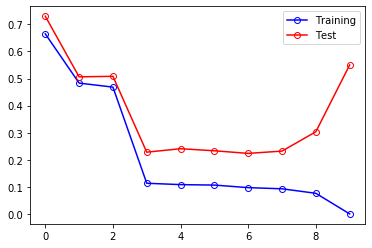

In [7]:
# Write your codes here.
poly_feature2 = PolynomialFeature(2)
poly_feature4 = PolynomialFeature(4)
poly_feature5 = PolynomialFeature(5)
poly_feature6 = PolynomialFeature(6)
poly_feature7 = PolynomialFeature(7)
poly_feature8 = PolynomialFeature(8)

x_trains2 = poly_feature2.transform(x_train)
x_test2 = poly_feature2.transform(x_test)
linear_reg.fit(x_trains2, y_train)
y_pred_test2 = linear_reg.predict(x_test2)
y_pred_trains2 = linear_reg.predict(x_trains2)

x_trains4 = poly_feature4.transform(x_train)
x_test4 = poly_feature4.transform(x_test)
linear_reg.fit(x_trains4, y_train)
y_pred_test4 = linear_reg.predict(x_test4)
y_pred_trains4 = linear_reg.predict(x_trains4)

x_trains5 = poly_feature5.transform(x_train)
x_test5 = poly_feature5.transform(x_test)
linear_reg.fit(x_trains5, y_train)
y_pred_test5 = linear_reg.predict(x_test5)
y_pred_trains5 = linear_reg.predict(x_trains5)

x_trains6 = poly_feature6.transform(x_train)
x_test6 = poly_feature6.transform(x_test)
linear_reg.fit(x_trains6, y_train)
y_pred_test6 = linear_reg.predict(x_test6)
y_pred_trains6 = linear_reg.predict(x_trains6)

x_trains7 = poly_feature7.transform(x_train)
x_test7 = poly_feature7.transform(x_test)
linear_reg.fit(x_trains7, y_train)
y_pred_test7 = linear_reg.predict(x_test7)
y_pred_trains7 = linear_reg.predict(x_trains7)

x_trains8 = poly_feature8.transform(x_train)
x_test8 = poly_feature8.transform(x_test)
linear_reg.fit(x_trains8, y_train)
y_pred_test8 = linear_reg.predict(x_test8)
y_pred_trains8 = linear_reg.predict(x_trains8)

training_errors = [rmse(y_pred_trains0, y_train),rmse(y_pred_trains1, y_train),rmse(y_pred_trains2, y_train),rmse(y_pred_trains3, y_train),rmse(y_pred_trains4, y_train),rmse(y_pred_trains5, y_train),rmse(y_pred_trains6, y_train),rmse(y_pred_trains7, y_train),rmse(y_pred_trains8, y_train),rmse(y_pred_trains9, y_train)]
test_errors = [rmse(y_pred_test0, y_test),rmse(y_pred_test1, y_test),rmse(y_pred_test2, y_test),rmse(y_pred_test3, y_test),rmse(y_pred_test4, y_test),rmse(y_pred_test5, y_test),rmse(y_pred_test6, y_test),rmse(y_pred_test7, y_test),rmse(y_pred_test8, y_test),rmse(y_pred_test9, y_test)]

x_axios = np.linspace(0, 9, 10)
plt.plot(x_axios, training_errors,'bo-', markerfacecolor='none', label="Training")
plt.plot(x_axios, test_errors,'ro-', markerfacecolor='none', label="Test")
plt.legend()
plt.show()

(d) Plot the graph of the predictive distribution resulting from a Bayesian treatment of polynomial curve fitting using an M=9 polynomial, with the fixed parameters $\alpha=5\times 10^{-3}$ and $\beta=11.1$(corresponding to the known noise variance).
![](bayesianRegression.png)

In [8]:
class BayesianRegression(Regression):
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 0))
        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve( w_precision, precision_prev @ mean_prev + self.beta * X.T @ t)

        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y

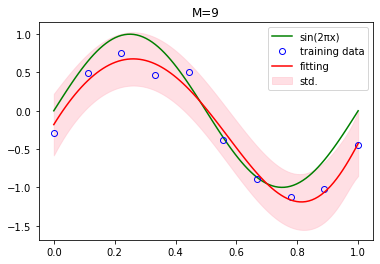

In [9]:
# Write your codes here.
bayes_reg = BayesianRegression(0.005,11.1)
bayes_reg.fit( x_trains9, y_pred_trains9)
[y_pred_bayes, y_std] = bayes_reg.predict(x_test9, return_std=True, sample_size=None)
plt.title("M=9")
plt.plot(x_test, y_test, 'g', label="sin(2πx)")
plt.plot(x_train, y_train, 'ob', markerfacecolor='none', label="training data")
plt.plot(x_test, y_pred_bayes ,'r', label="fitting")
plt.fill_between(x_test, y_pred_bayes - y_std, y_pred_bayes + y_std, color="pink", label="std.", alpha=0.5)
plt.legend()
plt.show()

(e) Change the $sample\_size$ to 2, 3 or 10 times than before, explain the change of $RMSE$.

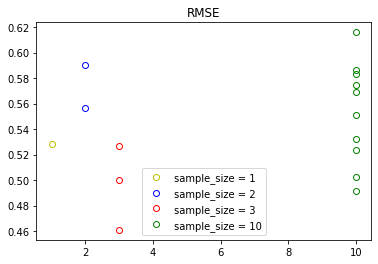

In [10]:
# Write your codes here.
y_samples2 = bayes_reg.predict(x_test9, return_std= True, sample_size=2)
y_samples3 = bayes_reg.predict(x_test9, return_std= True, sample_size=3)
y_samples10 = bayes_reg.predict(x_test9, return_std= True, sample_size=10)

rmse1 = rmse(y_pred_test9,y_pred_bayes)
rmse2 = [rmse(y_pred_test9,y_samples2[:,0]),rmse(y_pred_test9,y_samples2[:,1])]
rmse3 = [rmse(y_pred_test9,y_samples3[:,0]),rmse(y_pred_test9,y_samples3[:,1]),rmse(y_pred_test9,y_samples3[:,2])]
rmse10 = [rmse(y_pred_test9,y_samples10[:,0]),rmse(y_pred_test9,y_samples10[:,1]),rmse(y_pred_test9,y_samples10[:,2]),rmse(y_pred_test9,y_samples10[:,3]),rmse(y_pred_test9,y_samples10[:,4]),rmse(y_pred_test9,y_samples10[:,5]),rmse(y_pred_test9,y_samples10[:,6]),rmse(y_pred_test9,y_samples10[:,7]),rmse(y_pred_test9,y_samples10[:,8]),rmse(y_pred_test9,y_samples10[:,9])]

x_axios = np.linspace(0, 9, 10)
plt.title("RMSE")
plt.plot(1, rmse1, 'oy', markerfacecolor='none', label="sample_size = 1")
plt.plot(2, rmse2[0], 'ob', markerfacecolor='none', label="sample_size = 2")
plt.plot(2, rmse2[1], 'ob', markerfacecolor='none')
plt.plot(3, rmse3[0], 'or', markerfacecolor='none', label="sample_size = 3")
plt.plot(3, rmse3[1], 'or', markerfacecolor='none')
plt.plot(3, rmse3[2], 'or', markerfacecolor='none')
plt.plot(10, rmse10[0], 'og', markerfacecolor='none', label="sample_size = 10")
plt.plot(10, rmse10[1], 'og', markerfacecolor='none')
plt.plot(10, rmse10[2], 'og', markerfacecolor='none')
plt.plot(10, rmse10[3], 'og', markerfacecolor='none')
plt.plot(10, rmse10[4], 'og', markerfacecolor='none')
plt.plot(10, rmse10[5], 'og', markerfacecolor='none')
plt.plot(10, rmse10[6], 'og', markerfacecolor='none')
plt.plot(10, rmse10[7], 'og', markerfacecolor='none')
plt.plot(10, rmse10[8], 'og', markerfacecolor='none')
plt.plot(10, rmse10[9], 'og', markerfacecolor='none')
plt.legend()
plt.show()

# Because of there be the standard deviation of the predictive distribution, the more samples we generate, the rmse be more uniformly distribution on the probabaty range.